In [ ]:
#https://www.kaggle.com/rohanrao/nifty50-stock-market-data
#https://data.covid19india.org/

#finalised data - 
#https://github.com/sr4saurabh/JSON_to_csv_cleaning
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_files = []
for each_file in glob.glob('/content/drive/MyDrive/dataset/*.{}'.format('csv')):
     csv_files.append(each_file)
print(csv_files)

['/content/drive/MyDrive/dataset/HDFCBANK.csv', '/content/drive/MyDrive/dataset/BAJFINANCE.csv', '/content/drive/MyDrive/dataset/BHARTIARTL.csv', '/content/drive/MyDrive/dataset/BAJAJFINSV.csv', '/content/drive/MyDrive/dataset/COALINDIA.csv', '/content/drive/MyDrive/dataset/BRITANNIA.csv', '/content/drive/MyDrive/dataset/HDFC.csv', '/content/drive/MyDrive/dataset/GRASIM.csv', '/content/drive/MyDrive/dataset/EICHERMOT.csv', '/content/drive/MyDrive/dataset/HINDALCO.csv', '/content/drive/MyDrive/dataset/HEROMOTOCO.csv', '/content/drive/MyDrive/dataset/HINDUNILVR.csv', '/content/drive/MyDrive/dataset/DRREDDY.csv', '/content/drive/MyDrive/dataset/AXISBANK.csv', '/content/drive/MyDrive/dataset/ADANIPORTS.csv', '/content/drive/MyDrive/dataset/CIPLA.csv', '/content/drive/MyDrive/dataset/ASIANPAINT.csv', '/content/drive/MyDrive/dataset/BPCL.csv', '/content/drive/MyDrive/dataset/BAJAJ-AUTO.csv', '/content/drive/MyDrive/dataset/HCLTECH.csv', '/content/drive/MyDrive/dataset/GAIL.csv', '/content/dr

In [ ]:
for each_file in glob.glob('/content/drive/MyDrive/dataset/covid/*.{}'.format('csv')):
  covid_file=each_file
print(covid_file)

/content/drive/MyDrive/dataset/covid/case_time_series.csv


In [ ]:
df = []

In [ ]:
for each_file in csv_files:
  if(each_file != '/content/drive/MyDrive/dataset/stock_metadata.csv'):
    temp=pd.read_csv(each_file)
    temp["Date"]=pd.to_datetime(arg=temp["Date"],format="%Y-%m-%d")
    df.append(temp)


In [ ]:
covid_df = pd.read_csv(covid_file)
covid_df

,Date_YMD,Daily Confirmed
0,30-01-2020,1
1,31-01-2020,0
2,01-02-2020,0
3,02-02-2020,1
4,03-02-2020,1
...,...,...
636,27-10-2021,16351
637,28-10-2021,14307
638,29-10-2021,14215
639,30-10-2021,12940


In [ ]:
for each_df in df:
  each_df.drop(each_df.columns[[2,3,4,5,6,7,8,10,11,12,13,14]], axis = 1, inplace = True)

In [ ]:
df

[           Date    Symbol     VWAP
 0    2000-01-03  HDFCBANK   169.52
 1    2000-01-04  HDFCBANK   174.99
 2    2000-01-05  HDFCBANK   169.20
 3    2000-01-06  HDFCBANK   168.44
 4    2000-01-07  HDFCBANK   166.79
 ...         ...       ...      ...
 5301 2021-04-26  HDFCBANK  1413.19
 5302 2021-04-27  HDFCBANK  1430.40
 5303 2021-04-28  HDFCBANK  1463.19
 5304 2021-04-29  HDFCBANK  1481.15
 5305 2021-04-30  HDFCBANK  1421.13
 
 [5306 rows x 3 columns],            Date      Symbol     VWAP
 0    2000-01-03  BAJAUTOFIN    50.05
 1    2000-01-04  BAJAUTOFIN    48.56
 2    2000-01-05  BAJAUTOFIN    45.47
 3    2000-01-06  BAJAUTOFIN    44.43
 4    2000-01-07  BAJAUTOFIN    44.44
 ...         ...         ...      ...
 5230 2021-04-26  BAJFINANCE  4768.93
 5231 2021-04-27  BAJFINANCE  4818.15
 5232 2021-04-28  BAJFINANCE  5158.33
 5233 2021-04-29  BAJFINANCE  5440.24
 5234 2021-04-30  BAJFINANCE  5449.83
 
 [5235 rows x 3 columns],            Date      Symbol    VWAP
 0    2002-02-18     

In [ ]:
stocks=[]
for each_df in df:
  stock_name = each_df['Symbol'][0]
  stocks.append(stock_name)
  each_df.rename(columns={'VWAP': stock_name}, inplace=True)

In [ ]:
for each_df in df:
  each_df.drop(each_df.columns[1], axis = 1, inplace = True)

In [ ]:
df_cd = df[0]

for i in range(1, len(df)):
  df_cd = pd.merge(df_cd, df[i], how='inner', on = 'Date')
  

In [ ]:
print(df_cd.to_string())

           Date  HDFCBANK  BAJAUTOFIN  BHARTI  BAJAJFINSV  COALINDIA  BRITANNIA     HDFC   GRASIM  EICHERMOT  HINDALC0  HEROHONDA  HINDLEVER  DRREDDY  UTIBANK  MUNDRAPORT   CIPLA  ASIANPAINT     BPCL  BAJAJ-AUTO  HCLTECH    GAIL  INFOSYSTCH  KOTAKMAH       LT   JSWSTL     IOC     SBIN   MARUTI  INDUSINDBK     ONGC  RELIANCE    NTPC  NESTLEIND  ICICIBANK  POWERGRID      M&M     ITC  SUNPHARMA  SHREECEM  ZEETELE    TELCO  SESAGOA   WIPRO    TISCO    TITAN    TECHM      TCS  UNIPHOS  ULTRACEMCO
0    2010-11-04   2390.61      809.16  326.87      483.41     327.29     413.50   735.18  2411.53    1397.19    225.16    1840.85     298.18  1729.46  1546.01      161.38  350.54     2669.86   761.04     1603.89   412.51  492.88     3069.94    490.05  2186.02  1349.10  418.23  3375.10  1507.33      280.73  1356.68   1094.63  194.84    3647.43    1258.31     101.95   782.91  176.71    2247.97   2258.28   295.53  1216.40   336.69  437.50   619.51  3833.71   744.62  1070.51   211.68     1126.30
1    2

In [ ]:
cdf=pd.read_csv(covid_file)
cdf

,Date_YMD,Daily Confirmed
0,30-01-2020,1
1,31-01-2020,0
2,01-02-2020,0
3,02-02-2020,1
4,03-02-2020,1
...,...,...
636,27-10-2021,16351
637,28-10-2021,14307
638,29-10-2021,14215
639,30-10-2021,12940


In [ ]:
cdf['Date_YMD']=pd.to_datetime(arg=cdf['Date_YMD'],format="%d-%m-%Y")

In [ ]:
print(cdf.to_string())

      Date_YMD  Daily Confirmed
0   2020-01-30                1
1   2020-01-31                0
2   2020-02-01                0
3   2020-02-02                1
4   2020-02-03                1
5   2020-02-04                0
6   2020-02-05                0
7   2020-02-06                0
8   2020-02-07                0
9   2020-02-08                0
10  2020-02-09                0
11  2020-02-10                0
12  2020-02-11                0
13  2020-02-12                0
14  2020-02-13                0
15  2020-02-14                0
16  2020-02-15                0
17  2020-02-16                0
18  2020-02-17                0
19  2020-02-18                0
20  2020-02-19                0
21  2020-02-20                0
22  2020-02-21                0
23  2020-02-22                0
24  2020-02-23                0
25  2020-02-24                0
26  2020-02-25                0
27  2020-02-26                0
28  2020-02-27                0
29  2020-02-28                0
30  2020

In [ ]:
cdf = cdf.rename(columns={'Date_YMD': 'Date'})
cdf

,Date,Daily Confirmed
0,2020-01-30,1
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,1
4,2020-02-03,1
...,...,...
636,2021-10-27,16351
637,2021-10-28,14307
638,2021-10-29,14215
639,2021-10-30,12940


In [ ]:
newColumns=[]
for i in range(1, 31):
  temp="Date - "+str(i)
  newColumns.append(temp)
newColumns

['Date - 1',
 'Date - 2',
 'Date - 3',
 'Date - 4',
 'Date - 5',
 'Date - 6',
 'Date - 7',
 'Date - 8',
 'Date - 9',
 'Date - 10',
 'Date - 11',
 'Date - 12',
 'Date - 13',
 'Date - 14',
 'Date - 15',
 'Date - 16',
 'Date - 17',
 'Date - 18',
 'Date - 19',
 'Date - 20',
 'Date - 21',
 'Date - 22',
 'Date - 23',
 'Date - 24',
 'Date - 25',
 'Date - 26',
 'Date - 27',
 'Date - 28',
 'Date - 29',
 'Date - 30']

In [ ]:
confirmedCasesList=cdf["Daily Confirmed"].tolist()
confirmedCasesList

[1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 22,
 2,
 1,
 3,
 5,
 9,
 15,
 8,
 10,
 10,
 11,
 10,
 14,
 20,
 25,
 27,
 58,
 78,
 69,
 94,
 74,
 86,
 73,
 153,
 136,
 120,
 187,
 309,
 424,
 486,
 560,
 579,
 609,
 484,
 573,
 565,
 813,
 871,
 854,
 758,
 1243,
 1031,
 886,
 1061,
 922,
 1371,
 1580,
 1239,
 1537,
 1292,
 1667,
 1408,
 1835,
 1607,
 1568,
 1902,
 1705,
 1801,
 2396,
 2564,
 2952,
 3656,
 2971,
 3602,
 3344,
 3339,
 3175,
 4311,
 3592,
 3562,
 3726,
 3991,
 3808,
 4794,
 5049,
 4628,
 6154,
 5720,
 6023,
 6536,
 6667,
 7111,
 6414,
 5907,
 7246,
 7254,
 8138,
 8364,
 8789,
 7723,
 8812,
 9689,
 9847,
 9472,
 10408,
 10882,
 8536,
 9981,
 11156,
 11135,
 11306,
 12039,
 11405,
 10032,
 11086,
 13108,
 13829,
 14740,
 15918,
 15151,
 13560,
 15656,
 16868,
 18205,
 18255,
 20142,
 19610,
 18339,
 18256,
 19429,
 21947,
 22718,
 24018,
 23942,
 22500,
 23147,
 25561,
 25790,
 27762,

In [ ]:
for j in range(0,len(newColumns)):
  columnName=newColumns[j]
  columnValues=[]
  for i in range(0, len(confirmedCasesList)):
    if((i-j-1)<0):
      columnValues.append(0)
    else:
      columnValues.append(confirmedCasesList[i-j-1])
  cdf[columnName]=columnValues



In [ ]:
delta=[]

for i in range(0, len(confirmedCasesList)):
  if i==0:
    delta.append(100)
  else:
    if confirmedCasesList[i-1]==0:
      delta.append(0)
    else:
      pctCh=((confirmedCasesList[i]-confirmedCasesList[i-1])/confirmedCasesList[i-1])*100
      delta.append(pctCh)
cdf["delta"]=delta

delta=[]
temp=cdf["Date - 1"].tolist()
for i in range(0, len(temp)):
  if i==0:
    delta.append(100)
  else:
    if temp[i-1]==0:
      delta.append(0)
    else:
      pctCh=((temp[i]-temp[i-1])/temp[i-1])*100
      delta.append(pctCh)
cdf["delta Date-1"]=delta

temp_df=cdf.pop("Date")
cdf=cdf.iloc[:, ::-1]
cdf.insert(loc=0, column='Date', value=temp_df)

In [ ]:
print(cdf.to_string())

          Date  delta Date-1        delta  Date - 30  Date - 29  Date - 28  Date - 27  Date - 26  Date - 25  Date - 24  Date - 23  Date - 22  Date - 21  Date - 20  Date - 19  Date - 18  Date - 17  Date - 16  Date - 15  Date - 14  Date - 13  Date - 12  Date - 11  Date - 10  Date - 9  Date - 8  Date - 7  Date - 6  Date - 5  Date - 4  Date - 3  Date - 2  Date - 1  Daily Confirmed
0   2020-01-30    100.000000   100.000000          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0         0         0         0         0         0         0         0         0         0                1
1   2020-01-31      0.000000  -100.000000          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0 

In [ ]:
final_df=[]

for i in range(1, len(df)):
  temp_df = pd.merge(cdf, df[i], how='inner', on = 'Date')
  final_df.append(temp_df)

In [ ]:
final_df

[          Date  delta Date-1       delta  ...  Date - 1  Daily Confirmed  BAJAUTOFIN
 0   2020-01-30    100.000000  100.000000  ...         0                1     4412.12
 1   2020-01-31      0.000000 -100.000000  ...         1                0     4379.25
 2   2020-02-01   -100.000000    0.000000  ...         0                0     4337.38
 3   2020-02-03      0.000000    0.000000  ...         1                1     4330.01
 4   2020-02-04      0.000000 -100.000000  ...         1                0     4477.90
 ..         ...           ...         ...  ...       ...              ...         ...
 306 2021-04-26      1.622368   -9.921389  ...    354658           319471     4768.93
 307 2021-04-27     -9.921389   13.598104  ...    319471           362913     4818.15
 308 2021-04-28     13.598104    4.544064  ...    362913           379404     5158.33
 309 2021-04-29      4.544064    1.942257  ...    379404           386773     5440.24
 310 2021-04-30      1.942257    3.940554  ...    3867

In [ ]:
covid_df

,Date_YMD,Daily Confirmed
0,30-01-2020,1
1,31-01-2020,0
2,01-02-2020,0
3,02-02-2020,1
4,03-02-2020,1
...,...,...
636,27-10-2021,16351
637,28-10-2021,14307
638,29-10-2021,14215
639,30-10-2021,12940


In [ ]:
# covid_df = covid_df.drop(covid_df.columns[[0, 3,4,5,6,7]], axis=1)
covid_df=covid_df.rename(columns={'Date_YMD': 'Date'})
covid_df["Date"]=pd.to_datetime(arg=covid_df["Date"],format="%d-%m-%Y")
stock_covid_data=pd.merge(df_cd, covid_df, how='inner', on = 'Date')

In [ ]:
print(stock_covid_data.to_string())

          Date  HDFCBANK  BAJAUTOFIN  BHARTI  BAJAJFINSV  COALINDIA  BRITANNIA     HDFC   GRASIM  EICHERMOT  HINDALC0  HEROHONDA  HINDLEVER  DRREDDY  UTIBANK  MUNDRAPORT   CIPLA  ASIANPAINT    BPCL  BAJAJ-AUTO  HCLTECH    GAIL  INFOSYSTCH  KOTAKMAH       LT  JSWSTL     IOC    SBIN   MARUTI  INDUSINDBK    ONGC  RELIANCE    NTPC  NESTLEIND  ICICIBANK  POWERGRID     M&M     ITC  SUNPHARMA  SHREECEM  ZEETELE   TELCO  SESAGOA   WIPRO    TISCO    TITAN    TECHM      TCS  UNIPHOS  ULTRACEMCO  Daily Confirmed
0   2020-01-30   1224.75     4412.12  487.27     9734.08     189.81    3212.48  2412.56   794.77   20399.11    195.34    2493.80    2062.22  3145.50   731.04      379.78  452.71     1796.25  474.57     3128.47   607.69  124.60      781.35   1628.36  1364.75  258.63  117.99  311.18  7014.30     1238.24  116.28   1452.40  113.71   15627.43     528.60     194.01  573.84  234.92     443.15  23513.85   269.05  188.16   141.47  242.41   447.37  1181.36   792.84  2140.26   544.53     4511.85    

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
stock_covid_data_timeline=pd.merge(df_cd, cdf, how='inner', on = 'Date')
stock_covid_data_timeline

,Date,HDFCBANK,BAJAUTOFIN,BHARTI,BAJAJFINSV,COALINDIA,BRITANNIA,HDFC,GRASIM,EICHERMOT,HINDALC0,HEROHONDA,HINDLEVER,DRREDDY,UTIBANK,MUNDRAPORT,CIPLA,ASIANPAINT,BPCL,BAJAJ-AUTO,HCLTECH,GAIL,INFOSYSTCH,KOTAKMAH,LT,JSWSTL,IOC,SBIN,MARUTI,INDUSINDBK,ONGC,RELIANCE,NTPC,NESTLEIND,ICICIBANK,POWERGRID,M&M,ITC,SUNPHARMA,SHREECEM,...,WIPRO,TISCO,TITAN,TECHM,TCS,UNIPHOS,ULTRACEMCO,delta Date-1,delta,Date - 30,Date - 29,Date - 28,Date - 27,Date - 26,Date - 25,Date - 24,Date - 23,Date - 22,Date - 21,Date - 20,Date - 19,Date - 18,Date - 17,Date - 16,Date - 15,Date - 14,Date - 13,Date - 12,Date - 11,Date - 10,Date - 9,Date - 8,Date - 7,Date - 6,Date - 5,Date - 4,Date - 3,Date - 2,Date - 1,Daily Confirmed
0,2020-01-30,1224.75,4412.12,487.27,9734.08,189.81,3212.48,2412.56,794.77,20399.11,195.34,2493.80,2062.22,3145.50,731.04,379.78,452.71,1796.25,474.57,3128.47,607.69,124.60,781.35,1628.36,1364.75,258.63,117.99,311.18,7014.30,1238.24,116.28,1452.40,113.71,15627.43,528.60,194.01,573.84,234.92,443.15,23513.85,...,242.41,447.37,1181.36,792.84,2140.26,544.53,4511.85,100.000000,100.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2020-01-31,1230.24,4379.25,493.87,9529.80,183.40,3238.56,2418.92,783.81,20375.70,191.37,2509.76,2039.71,3145.55,730.38,371.94,448.23,1808.22,460.69,3206.66,595.05,120.99,776.84,1698.55,1370.07,254.04,113.87,316.25,6966.75,1259.62,110.04,1425.75,113.36,15436.18,527.45,187.47,570.67,236.11,437.61,23192.51,...,236.84,444.51,1188.22,794.80,2098.15,532.04,4448.76,0.000000,-100.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2020-02-01,1210.20,4337.38,494.96,9162.15,176.95,3160.11,2327.26,770.45,20246.45,186.66,2478.19,2074.27,3123.10,716.97,365.61,446.49,1789.78,449.48,3176.48,589.72,121.09,779.56,1665.68,1329.24,250.54,111.51,313.18,6939.09,1237.23,106.84,1402.89,110.89,15438.19,515.41,182.95,562.78,226.82,429.26,22981.60,...,236.50,431.17,1184.35,792.93,2129.70,517.41,4402.30,-100.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2020-02-03,1188.67,4330.01,505.20,9077.24,177.27,3215.67,2267.40,768.16,19910.48,182.39,2401.98,2162.00,3148.21,704.27,364.92,444.09,1832.22,457.07,3240.95,583.95,116.77,771.38,1661.90,1286.44,248.60,109.85,300.62,6946.13,1245.03,103.68,1380.77,110.21,16236.56,514.01,184.34,552.73,209.48,419.66,23004.53,...,237.39,427.35,1176.13,807.99,2136.37,511.82,4325.51,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,2020-02-04,1222.00,4477.90,512.37,9424.64,181.62,3242.09,2322.43,790.20,19685.51,187.57,2455.26,2167.76,3224.55,715.50,372.34,449.37,1877.61,471.58,3221.67,586.68,117.61,781.11,1690.91,1297.18,256.07,112.26,303.37,7133.75,1271.55,105.51,1419.31,111.41,16367.51,528.79,191.59,571.61,213.76,421.27,24324.66,...,239.57,446.32,1245.90,807.49,2111.28,521.13,4464.67,0.000000,-100.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2021-04-26,1413.19,4768.93,526.12,9995.72,127.30,3558.62,2508.07,1303.61,2359.51,351.91,2855.14,2340.89,5078.16,695.33,733.25,914.11,2557.47,421.33,3719.79,931.70,130.30,1343.19,1766.82,1334.93,651.46,88.28,345.26,6678.34,861.04,103.86,1941.32,102.08,16811.15,596.22,213.23,782.35,205.64,634.61,28138.76,...,479.77,942.98,1479.58,949.75,3122.35,591.78,6241.84,1.622368,-9.921389,62632,68206,56152,53237,72113,81398,89023,92994,103794,96563,115312,126276,131878,144945,152565,169914,160838,185297,199584,216828,234002,260895,275063,257003,294365,315752,332531,345296,348996,354658,319471
307,2021-04-27,1430.40,4818.15,534.45,10036.76,127.47,3539.42,2509.18,1323.07,2388.53,365.09,2912.01,2374.40,5065.33,692.83,747.67,909.22,2560.55,420.45,37

In [ ]:
for j in range(0,len(stocks)):
  list_prices=stock_covid_data_timeline[stocks[j]].tolist()
  delta=[]
  for i in range(0, len(list_prices)):
    if i==0:
      delta.append(100)
    else:
      if list_prices[i-1]==0:
        delta.append(0)
      else:
        pctCh=((list_prices[i]-list_prices[i-1])/list_prices[i-1])*100
        delta.append(pctCh)
  stock_covid_data_timeline["delta "+stocks[j]]=delta

In [ ]:
stock_covid_data_timeline=stock_covid_data_timeline.round(3)
print(stock_covid_data_timeline.to_string())


          Date  HDFCBANK  BAJAUTOFIN  BHARTI  BAJAJFINSV  COALINDIA  BRITANNIA     HDFC   GRASIM  EICHERMOT  HINDALC0  HEROHONDA  HINDLEVER  DRREDDY  UTIBANK  MUNDRAPORT   CIPLA  ASIANPAINT    BPCL  BAJAJ-AUTO  HCLTECH    GAIL  INFOSYSTCH  KOTAKMAH       LT  JSWSTL     IOC    SBIN   MARUTI  INDUSINDBK    ONGC  RELIANCE    NTPC  NESTLEIND  ICICIBANK  POWERGRID     M&M     ITC  SUNPHARMA  SHREECEM  ZEETELE   TELCO  SESAGOA   WIPRO    TISCO    TITAN    TECHM      TCS  UNIPHOS  ULTRACEMCO  delta Date-1     delta  Date - 30  Date - 29  Date - 28  Date - 27  Date - 26  Date - 25  Date - 24  Date - 23  Date - 22  Date - 21  Date - 20  Date - 19  Date - 18  Date - 17  Date - 16  Date - 15  Date - 14  Date - 13  Date - 12  Date - 11  Date - 10  Date - 9  Date - 8  Date - 7  Date - 6  Date - 5  Date - 4  Date - 3  Date - 2  Date - 1  Daily Confirmed  delta HDFCBANK  delta BAJAUTOFIN  delta BHARTI  delta BAJAJFINSV  delta COALINDIA  delta BRITANNIA  delta HDFC  delta GRASIM  delta EICHERMOT  delt

     |████████████████████████████████| 47 kB 4.0 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25025 sha256=90fa16379531b807a5472d4c9074bec06653913b714da8dfcf40616e3d192b47
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=8706083b6880ce7e31473ea088fc9caad6c2d85e08a29bd30af1b69ecc1c8779
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


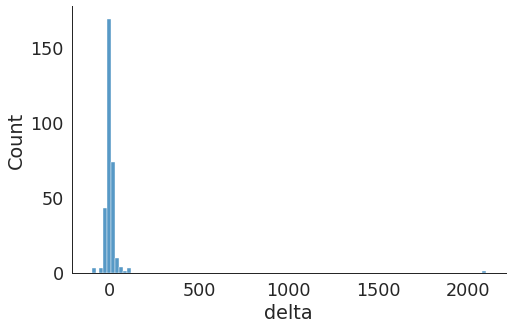

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions
stock_covid_data_timeline.to_csv("dist2.csv")
dataset = pd.read_csv("dist2.csv")
sns.set_style('white')
sns.set_context("paper" , font_scale = 2)
sns.displot(data=dataset, x="delta", kind="hist", bins = 100, aspect = 1.5)


None
         sumsquare_error           aic          bic    kl_div
beta        9.784873e-10  2.849017e+03 -8213.815559       inf
burr        2.622121e-09  3.088423e+03 -7907.253181       inf
lognorm     2.734826e-09  3.034781e+03 -7899.904843       inf
norm        3.415448e-09  3.376415e+03 -7836.527703       inf
gamma       5.183734e-09  1.184465e+07 -7701.033418  1.477113
HDFCBANK    {'beta': {'a': 1.027555171196226, 'b': 0.9908600050517464, 'loc': 775.7682971649194, 'scale': 849.5117028350807}} 

BAJAUTOFIN    {'beta': {'a': 0.9410804689182501, 'b': 0.8804510374722706, 'loc': 1865.1663277164084, 'scale': 3874.1436722835924}} 

BHARTI    {'beta': {'a': 3.5106329687880216, 'b': 2.0533128972624457, 'loc': 358.0074231897088, 'scale': 257.23632085003504}} 

BAJAJFINSV    {'burr': {'c': 3.95913766954613, 'd': 3892.4469046935446, 'loc': -23.1105694704263, 'scale': 771.2200342244071}} 

COALINDIA    {'lognorm': {'s': 0.3582657312831529, 'loc': 95.30386863580361, 'scale': 38.95455061517008}}

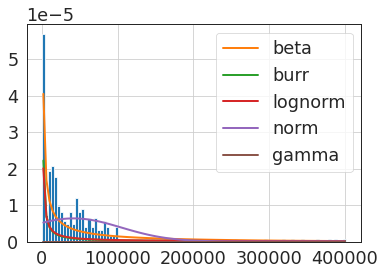

In [ ]:
delta_cases = cases
delta_comp_names = list(df_cd.columns)
#print(delta_comp_names)
delta_comp_names.remove('Date')
#print(delta_comp_names)
for x in range(len(delta_comp_names)):
  delta_comp_names[x] = delta_comp_names[x]
#print(delta_comp_names)

cases_d = stock_covid_data_timeline['Daily Confirmed'].values
f = Fitter(cases_d ,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
print(f.fit())
print(f.summary())

#finding distribution of stock prices by company
for company in delta_comp_names:
  sp = stock_covid_data_timeline[company].values
  f = Fitter(sp ,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
  f.fit()
  print(company , "  " , f.get_best(method = 'sumsquare_error') ,"\n")
 
  #f = Fitter(cases,
           #distributions = get_common_distributions())
  #f.fit()
  #f.summary()


In [ ]:
from scipy.stats import kendalltau

In [ ]:
#hypothesis - assumption - there is a relation b/w stockprices and no. of covid cases
#distribution - normal , non-normal
#normal - ks test , chi-square #non-normal - kendall tau 
# p- value :- prob that there is a relation by chance - null hypothesis 
# there is a certain relation , assumed significance level = 0.1

#we understood that kendal tau  is a non-parametric test that can be used for non-normal distributions.
for company in delta_comp_names:
  x = np.array(stock_covid_data_timeline['Daily Confirmed'].values)
  y = np.array(stock_covid_data_timeline[company].values)
  cor , p = kendalltau(x,y)
  #print(company , "    " , p)
  if(p < 0.1):
    print(company)


HDFCBANK
BAJAUTOFIN
BHARTI
COALINDIA
BRITANNIA
GRASIM
EICHERMOT
HINDALC0
HEROHONDA
DRREDDY
MUNDRAPORT
CIPLA
ASIANPAINT
BPCL
BAJAJ-AUTO
HCLTECH
INFOSYSTCH
JSWSTL
IOC
MARUTI
RELIANCE
NTPC
POWERGRID
M&M
SUNPHARMA
TELCO
SESAGOA
WIPRO
TISCO
TITAN
TECHM
TCS
UNIPHOS
ULTRACEMCO
